In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def p(kp,CurrentValue,AimValue):
    e = AimValue - CurrentValue
    u = kp*e
    return u

In [24]:
def pi(kp,ki,CurrentValue,AimValue,e_sum):
    e = AimValue - CurrentValue
    e_sum += e
    u = kp*e + ki*e_sum
    return u ,e_sum

In [44]:
def pid(kp,ki,kd,CurrentValue,AimValue,e_sum,e_pre):
    e = AimValue - CurrentValue
    e_sum += e
    e_diff = e - e_pre
    u = kp*e + ki*e_sum + kd*e_diff
    return u ,e_sum,e

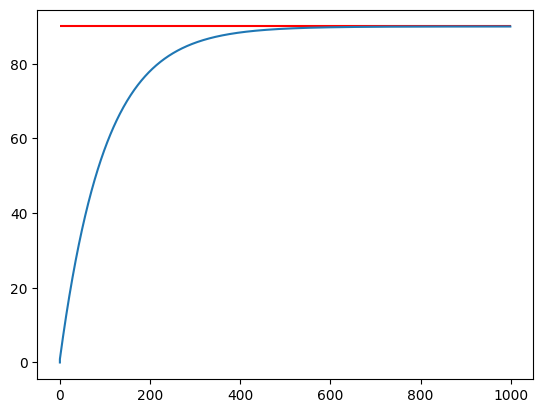

In [16]:
kp = 0.01
initialValue = 0
AimValue = 90
timelenght = 1000
CurrentValue = initialValue

Currentlist = [initialValue]
timelist = [0]

for t in range(timelenght):
    u = p(kp,CurrentValue,AimValue)
    CurrentValue += u
    Currentlist.append(CurrentValue)
    timelist.append(t)
    #print(CurrentValue)

plt.hlines(90,0,1000,'red')
plt.plot(timelist,Currentlist) 

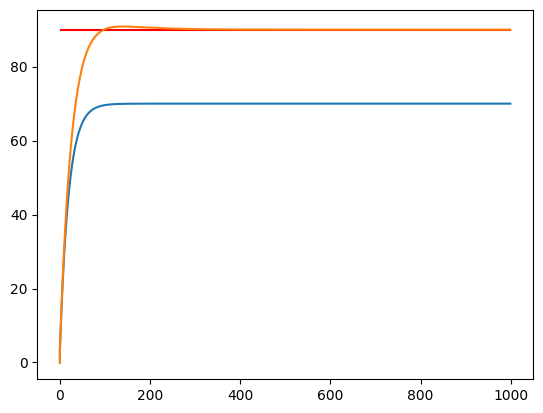

In [39]:
kp = 0.05
ki = 0.0005
initialValue = 0
AimValue = 90
timelenght = 1000
CurrentValue = initialValue
e_sum = 0
Currentlist_p = [initialValue]
Currentlist_pi = [initialValue]
timelist = [0]

offset = 1

for t in range(timelenght):
    u = p(kp,CurrentValue,AimValue)
    CurrentValue += (u-offset)
    Currentlist_p.append(CurrentValue)
    timelist.append(t)
    #print(CurrentValue)

CurrentValue = 0
for t in range(timelenght):
    u = pi(kp,ki,CurrentValue,AimValue,e_sum)
    CurrentValue += u[0]
    CurrentValue -= offset
    e_sum = u[1]
    Currentlist_pi.append(CurrentValue)
    #timelist.append(t)
    #print(CurrentValue)

plt.hlines(90,0,1000,'red')
#plt.hlines(80,0,1000,'red')
#print(timelist)
#print(Currentlist_p)
plt.plot(timelist,Currentlist_p)
plt.plot(timelist,Currentlist_pi) 

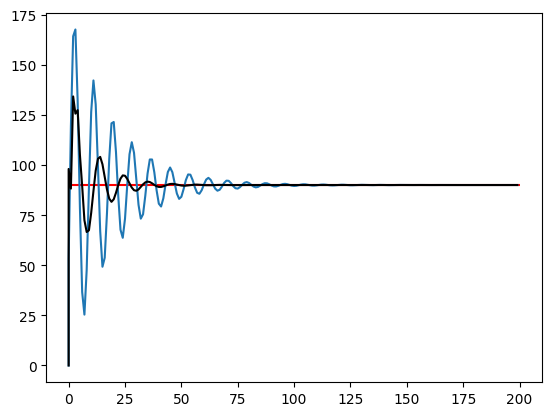

In [58]:
kp = 0.1
ki = 0.5
kd = 0.5
initialValue = 0
AimValue = 90
timelenght = 200
CurrentValue = initialValue
e_sum = 0
e_pre = 0
Currentlist_pi = [initialValue]
Currentlist_pid = [initialValue]
timelist = [0]

offset = 1



for t in range(timelenght):
    u = pi(kp,ki,CurrentValue,AimValue,e_sum)
    CurrentValue += u[0]
    CurrentValue -= offset
    e_sum = u[1]
    Currentlist_pi.append(CurrentValue)
    timelist.append(t)
    #print(CurrentValue)
    
CurrentValue = 0
e_sum = 0

for t in range(timelenght):
    u = pid(kp,ki,kd,CurrentValue,AimValue,e_sum,e_pre)
    CurrentValue += u[0]
    CurrentValue -= offset
    e_sum = u[1]
    e_pre = u[2]
    Currentlist_pid.append(CurrentValue)
    #timelist.append(t)
    #print(CurrentValue)

plt.hlines(90,0,200,'red')
#plt.hlines(80,0,1000,'red')
#print(timelist)
#print(Currentlist_p)
plt.plot(timelist,Currentlist_pi)
plt.plot(timelist,Currentlist_pid, 'black') 